In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import MiniBatchKMeans, Birch
from scipy.cluster.hierarchy import dendrogram

import re
import string
import time
from PIL import Image
from collections import Counter

import plotly.express as px

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import words as nltk_words
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saxen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saxen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saxen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\saxen\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\saxen\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [2]:
data = pd.read_csv('named_entity_extraction.csv')
data

,combined
0,Ukraine Angry Zelensky Russian Ukrainian
1,Ukraine Jeremy Bowen Irpin Russian
2,Ukraine One
3,Manchester Arena Roussos Manchester Arena
4,Ukraine PM Boris Johnson Canadian Dutch
...,...
29140,Bell England New Zealand Lauren Bell England N...
29141,British Andy Murray Wimbledon Thursday Jamie t...
29142,Mertens Emma Raducanu- Elise Mertens third Wim...
29143,John White the Cup Winners Cup


## Vectorization

In [3]:
cv = CountVectorizer(analyzer='word')
cv_data = cv.fit_transform(data['combined'])
dtm_data = pd.DataFrame(cv_data.toarray(), columns=cv.get_feature_names_out())
dtm_data.index = data.index
dtm_data.head(5)

,aa,aaa,aaliyah,aamir,aanoch,aardman,aaron,aarons,aarwangen,aastha,...,zuu,zuwara,zverev,zwelithini,zwerner,zúñiga,élysée,élysées,úsuga,šefčovič
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
word_freq_data_normalized = dtm_data.T
word_freq_data_normalized

,0,1,2,3,4,5,6,7,8,9,...,29135,29136,29137,29138,29139,29140,29141,29142,29143,29144
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaliyah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aamir,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aanoch,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zúñiga,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
élysée,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
élysées,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
úsuga,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
word_freq_data = pd.DataFrame(word_freq_data_normalized.sum(axis=1).reset_index()).rename(columns={'index': 'word', 0: 'freq'})
word_freq_data

,word,freq
0,aa,1
1,aaa,1
2,aaliyah,2
3,aamir,5
4,aanoch,1
...,...,...
16110,zúñiga,1
16111,élysée,1
16112,élysées,1
16113,úsuga,1


In [6]:
TRIM_QUANTILE = 0.7
word_freq_data[word_freq_data['freq'] >= word_freq_data['freq'].quantile(TRIM_QUANTILE)]

,word,freq
3,aamir,5
5,aardman,4
6,aaron,30
13,abbas,7
14,abbess,4
...,...,...
16100,zuma,3
16103,zurcher,4
16104,zurich,9
16107,zverev,13


In [7]:
stopwords = list(word_freq_data[word_freq_data['freq'] < word_freq_data['freq'].quantile(TRIM_QUANTILE)]['word'])
vec_vocab = list(word_freq_data[word_freq_data['freq'] >= word_freq_data['freq'].quantile(TRIM_QUANTILE)]['word'])

In [8]:
tfidf_vectorizer = TfidfVectorizer(analyzer='word', stop_words=stopwords, vocabulary=vec_vocab)
tfidf_vectorizer

TfidfVectorizer(stop_words=['aa', 'aaa', 'aaliyah', 'aanoch', 'aarons',
                            'aarwangen', 'aastha', 'ab', 'abattoir', 'abba',
                            'abbie', 'abbkr', 'abbygail', 'abdel', 'abdelmajid',
                            'abdesalem', 'abdollahian', 'abdourahmane',
                            'abdujalil', 'abdulaziz', 'abdulhak', 'abdullah',
                            'abdullatif', 'abdurahman', 'abdurasulov', 'abdy',
                            'abedi', 'abelleira', 'abercombie', 'aberdare', ...],
                vocabulary=['aamir', 'aardman', 'aaron', 'abbas', 'abbess',
                            'abbey', 'abbington', 'abbott', 'abby', 'abdallah',
                            'abdeslam', 'abdul', 'abe', 'abed', 'abercrombie',
                            'aberdeen', 'aberdeenshire', 'aberg', 'aberystwyth',
                            'abigail', 'abortion', 'about', 'above',
                            'abramovich', 'abu', 'abualouf', 'abuja', 'ac',
                            'academic', 'academy', ...])

In [9]:
tfidf_matrix = tfidf_vectorizer.fit_transform(data['combined'])
tfidf_matrix

<29145x5999 sparse matrix of type '<class 'numpy.float64'>'
	with 141539 stored elements in Compressed Sparse Row format>

In [10]:
tfidf_data = pd.DataFrame(tfidf_matrix.toarray())
tfidf_data

,0,1,2,3,4,5,6,7,8,9,...,5989,5990,5991,5992,5993,5994,5995,5996,5997,5998
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
feature_names = tfidf_vectorizer.get_feature_names_out()
feature_names

array(['aamir', 'aardman', 'aaron', ..., 'zurich', 'zverev', 'zwerner'],
      dtype=object)

In [12]:
tfidf_data.columns = feature_names
tfidf_data

,aamir,aardman,aaron,abbas,abbess,abbey,abbington,abbott,abby,abdallah,...,zone,zoo,zoysa,zuckerberg,zulu,zuma,zurcher,zurich,zverev,zwerner
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Truncated SVD

In [13]:
tsvd = TruncatedSVD(n_components=100, random_state=37)
vec_matrix_tsvd = tsvd.fit_transform(tfidf_matrix)
vec_matrix_tsvd

array([[ 3.70100192e-01, -1.57513150e-01, -6.83737677e-02, ...,
         1.37217743e-02, -3.02767116e-02,  9.29068536e-03],
       [ 3.00858418e-01, -1.27104600e-01, -5.63701200e-02, ...,
        -7.47138192e-02,  6.31071697e-02, -8.75290025e-02],
       [ 5.35261316e-01, -1.64823368e-01, -8.01588292e-02, ...,
        -5.64476124e-03,  5.04517283e-03,  5.89224892e-03],
       ...,
       [ 4.63581405e-03,  9.61885301e-03,  5.26991488e-04, ...,
        -4.49449441e-02,  2.93836000e-02, -1.69805027e-04],
       [ 9.41807600e-02,  3.19550461e-01, -1.92300159e-01, ...,
        -2.62926362e-02, -1.11472370e-01,  7.87986066e-02],
       [ 2.79179297e-02,  6.73470730e-02, -1.65545713e-02, ...,
         1.56905022e-02,  3.22843706e-02, -9.89214731e-04]])

In [14]:
pd.DataFrame(vec_matrix_tsvd)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.370100,-0.157513,-0.068374,-0.049302,0.009015,0.019166,-0.003758,0.024177,0.001083,0.003854,...,0.013363,-0.001541,-0.004595,-0.036555,0.004941,-0.011797,0.004209,0.013722,-0.030277,0.009291
1,0.300858,-0.127105,-0.056370,-0.028028,0.012207,0.006062,0.000082,0.033696,0.003104,-0.002475,...,0.048167,0.072145,0.027766,0.034533,0.002059,-0.031241,0.015385,-0.074714,0.063107,-0.087529
2,0.535261,-0.164823,-0.080159,-0.007258,0.002031,0.051401,0.005555,0.011960,-0.008372,-0.003556,...,-0.011354,-0.000968,0.001813,0.008182,-0.003687,0.000295,-0.001696,-0.005645,0.005045,0.005892
3,0.009659,0.027784,-0.006333,0.025413,-0.004138,0.030200,-0.040293,-0.003408,-0.096567,-0.088105,...,0.023433,0.023285,-0.013093,0.000189,0.007116,-0.009452,-0.004453,0.002649,0.020595,-0.004547
4,0.207783,-0.073028,-0.029091,-0.015092,0.007988,0.019539,0.006340,0.006357,-0.048806,-0.086130,...,0.010784,0.010610,0.007190,0.020311,-0.009620,-0.008048,-0.003513,-0.003588,-0.002801,-0.016391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29140,0.043857,0.160138,-0.078156,-0.037990,0.001835,0.051790,0.205053,0.011840,0.048791,-0.005048,...,-0.004826,-0.001051,0.020245,0.007360,0.016852,-0.007560,0.008051,0.006089,-0.001110,0.017460
29141,0.039863,0.045512,0.028226,0.064176,-0.009652,0.044999,-0.007951,0.005125,-0.107737,0.120639,...,0.015888,0.063222,-0.090075,0.000354,0.064052,0.132429,0.101679,-0.147781,0.007624,0.007214
29142,0.004636,0.009619,0.000527,0.005666,-0.004039,0.004810,-0.000166,-0.001801,-0.008184,-0.005492,...,0.016605,-0.005267,-0.069059,-0.014956,0.020619,0.062628,0.036216,-0.044945,0.029384,-0.000170
29143,0.094181,0.319550,-0.192300,-0.079674,-0.056343,-0.109925,-0.258656,0.001404,-0.005002,-0.017180,...,-0.114967,0.037181,0.000455,-0.136122,-0.089080,0.110529,0.024865,-0.026293,-0.111472,0.078799


In [15]:
BATCH_SIZE = 10

In [16]:
kmeans_clst = MiniBatchKMeans(n_clusters=5, random_state=37, batch_size=10)
kmeans_clst = kmeans_clst.partial_fit(vec_matrix_tsvd)

In [17]:
kmeans_clst.cluster_centers_

array([[ 8.58080909e-03,  7.57639623e-03,  2.43188930e-03,
         5.89741486e-03, -3.95570208e-03, -5.72725102e-04,
        -5.04543228e-03, -2.86786861e-03, -7.60554755e-03,
         2.04228929e-03, -1.64118634e-03,  1.65633209e-03,
         3.96998420e-03, -6.05880253e-04,  3.70250916e-04,
        -7.49918752e-05, -1.77415023e-03,  3.07831400e-03,
         6.61318178e-03,  1.87899536e-03, -5.18274298e-03,
        -1.93461849e-03, -1.27273057e-03, -3.79529592e-04,
         8.61973243e-03,  7.17463728e-04,  3.23010047e-03,
         7.59239679e-03, -4.13753758e-03, -7.62621769e-03,
         9.76815418e-03, -1.17848682e-02, -4.82987547e-03,
         7.32336506e-06, -1.18012274e-02,  8.00568613e-04,
         6.19662495e-03,  5.20967038e-03, -2.10155652e-02,
         2.55003295e-02,  2.05556277e-03, -6.93246827e-03,
        -2.24291923e-03,  1.01949276e-02, -7.70733808e-03,
        -5.20898651e-03,  1.05627061e-02,  2.31530297e-03,
        -3.55844040e-04,  5.64174849e-03, -1.80925159e-0

In [18]:
kmeans_clst.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [19]:
data['kmeans_label'] = kmeans_clst.labels_

# Visualizing results

In [20]:
tsvd_centers = TruncatedSVD(n_components=2, random_state=37)
tsvd_centers.fit(kmeans_clst.cluster_centers_)
d2_centers = tsvd_centers.transform(kmeans_clst.cluster_centers_)
d2_points = tsvd_centers.transform(vec_matrix_tsvd)

In [21]:
tsvd_centers = TruncatedSVD(n_components=3, random_state=37)
tsvd_centers.fit(kmeans_clst.cluster_centers_)
d3_centers = tsvd_centers.transform(kmeans_clst.cluster_centers_)
d3_points = tsvd_centers.transform(vec_matrix_tsvd)

In [22]:
d2_centers

array([[ 0.00842636,  0.04881857],
       [ 0.02421934,  0.02424999],
       [ 0.04798268,  0.49741419],
       [ 0.68158245, -0.03694383],
       [ 0.02013105,  0.01561359]])

In [23]:
d2_points

array([[ 0.02727524, -0.00568753],
       [ 0.01580382,  0.00848162],
       [ 0.04298131, -0.00199437],
       ...,
       [ 0.0037147 ,  0.03818357],
       [ 0.0092244 ,  0.05339036],
       [ 0.00306637,  0.00338882]])

In [24]:
sns.set_style('darkgrid')

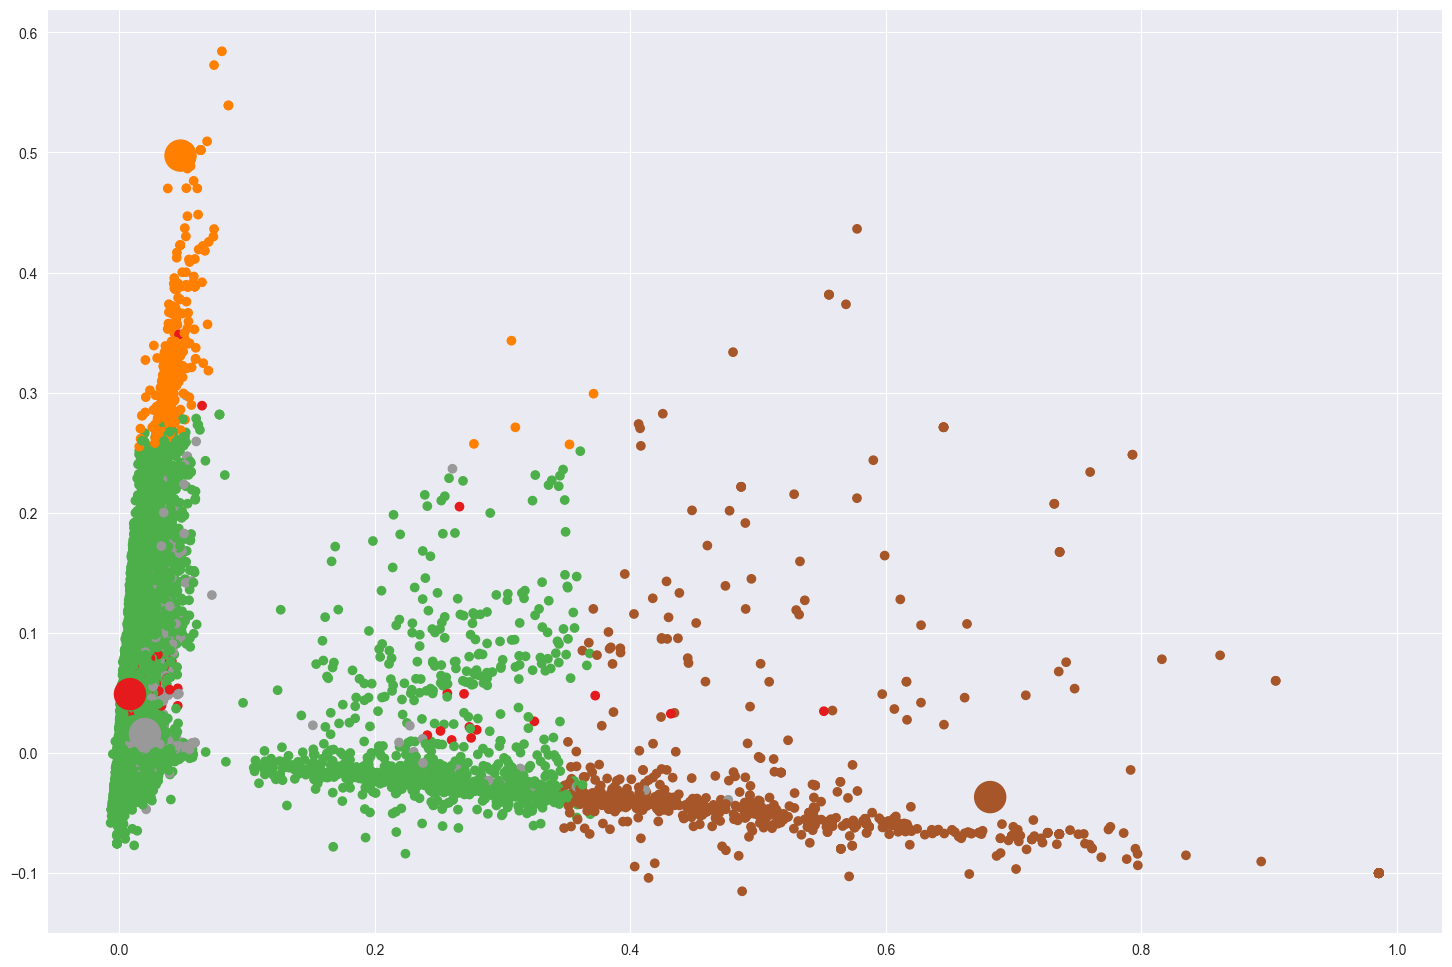

In [25]:
plt.figure(figsize=(18, 12))
plt.scatter(x=d2_points[:, 0], y=d2_points[:, 1], c=kmeans_clst.labels_, cmap='Set1')
plt.scatter(x=d2_centers[:, 0], y=d2_centers[:, 1], c=np.unique(kmeans_clst.labels_), s=[500, 500, 500, 500, 500], cmap='Set1')

In [26]:
fig_centers = px.scatter(x=d2_centers[:, 0], y=d2_centers[:, 1], color=np.unique(kmeans_clst.labels_), size=[500, 500, 500, 500, 500])
fig_points = px.scatter(x=d2_points[:, 0], y=d2_points[:, 1], color=kmeans_clst.labels_)
fig = go.Figure(data=fig_centers.data)
fig.add_traces(fig_points.data)
fig.show()

In [27]:
fig_centers = px.scatter_3d(x=d3_centers[:, 0], y=d3_centers[:, 1], z=d3_centers[:, 2], color=np.unique(kmeans_clst.labels_), size=[50, 50, 50, 50, 50], size_max=50)
fig_points = px.scatter_3d(x=d3_points[:, 0], y=d3_points[:, 1], z=d3_points[:, 2], color=kmeans_clst.labels_, symbol=kmeans_clst.labels_)
fig = go.Figure(data=fig_centers.data + fig_points.data)
fig.show()

In [28]:
def to_viz_data(data, tfidf_data, labels):
    transformed_data = []
    for label in labels:
        new_data = tfidf_data[tfidf_data[data['label'] == label].idxmax(axis=1)].max()[:200]
        transformed_data.append(pd.concat([new_data.reset_index(), pd.Series([label] * len(new_data))], axis=1))
    viz_data = pd.concat(transformed_data)
    viz_data.columns = ['word', 'tfidf', 'label']
    return viz_data

In [29]:
viz_data = to_viz_data(data.rename({'kmeans_label': 'label'}, axis=1), tfidf_data, data['kmeans_label'].unique())
viz_data

,word,tfidf,label
0,angry,0.667360,1
1,irpin,0.852461,1
2,one,1.000000,1
3,arena,0.855417,1
4,canadian,1.000000,1
...,...,...,...
195,england,1.000000,4
196,euro,1.000000,4
197,euro,1.000000,4
198,georgia,0.879809,4


In [37]:
def visualize_clusters(viz_data):
    viz_data = viz_data.copy()
    viz_data['label'] += np.abs(viz_data['label'].min())
    viz_data = viz_data.sort_values('label').groupby('label').head(20)
    fig = px.scatter(viz_data, x='label', y='tfidf', color='label', text='word', hover_data=['label', 'tfidf', 'word'])
    fig.update_layout(
        font=dict(
            family='Courier New, monospace',
            size=18,  # Set the font size here
            color='black'
        ),
        xaxis = dict(
            tickmode = 'linear',
            tick0 = 0,
            dtick = 1
        ),
        yaxis = dict(
            tickmode = 'linear',
            tick0 = 0,
            dtick = 0.05
        )
    )
    text_fonts = (np.e**(viz_data['tfidf'] * 3.5)).astype(int)
    fig.update_traces(mode='text', selector=dict(type='scatter'), textfont_size=(text_fonts).values)
    fig.for_each_trace(lambda t: t.update(textfont_color=np.array(px.colors.qualitative.Dark24)[t.marker.color], textposition='bottom center'))
    fig.show()

In [38]:
visualize_clusters(viz_data)